In [1]:
import numpy as np
from src.models import ols_normal_eq, ols_gd
from src.evaluation import mse, r2_score
import matplotlib.pyplot as plt 

# Closed form OLS vs Gradient decent

In [4]:
n, d = 100, 30
X = np.random.randn(n, d)
y = np.random.randn(100)

In [12]:
beta, y_hat, residuals = ols_normal_eq(X, y, add_intercept=False, l2=0.001)
beta_gd, losses, grad_norm_history = ols_gd(X, y, lr=1e-2, standardize=False)

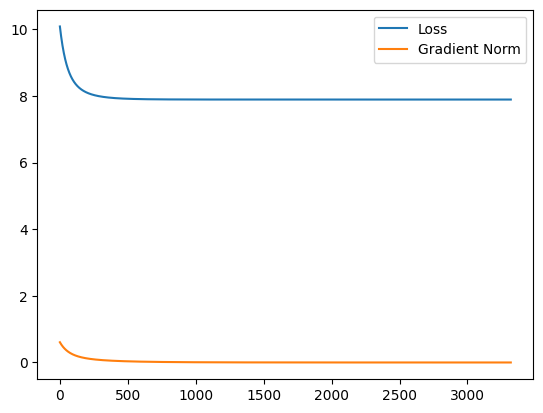

First five coordinates of solution via closed form and gradient decent
[0.0438516  0.21050305 0.13376537 0.12880128 0.2321934 ]
[0.04385491 0.21049859 0.13376833 0.12879414 0.23219035]


In [13]:
plt.plot(losses, label="Loss")
plt.plot(grad_norm_history, label="Gradient Norm")
plt.legend()
plt.show()
print("First five coordinates of solution via closed form and gradient decent")
print(beta[:5])
print(beta_gd[:5])

In [9]:
print("First five coordinates of y and y^:")
print(y[:5])
print(y_hat[:5])

First five coordinates of y and y^:
[-0.47249754  0.49842097  1.02162922  1.19178737 -1.32815844]
[-0.19171103  0.44555043  0.51548374 -0.55271728 -0.94098215]


In [14]:
print("Closed form OLS evaluation:")
print(f"MSE: {mse(y, y_hat)}")
print(f"R2: {r2_score(y, y_hat)}")

print("Gradient Descent OLS evaluation:")
y_hat_gd = X @ beta_gd
print(f"MSE: {mse(y, y_hat_gd)}")
print(f"R2: {r2_score(y, y_hat_gd)}")

Closed form OLS evaluation:
MSE: 0.6231191738190577
R2: 0.38536184578196553
Gradient Descent OLS evaluation:
MSE: 0.623119174060447
R2: 0.38536184554386166


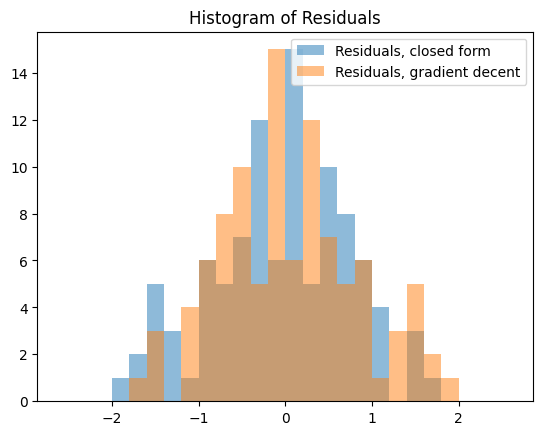

In [20]:
plt.hist(residuals, bins=list(np.linspace(-2.6, 2.6, 27)), label="Residuals, closed form", alpha=0.5)
plt.hist(y_hat_gd - y, bins=list(np.linspace(-2.6, 2.6, 27)), label="Residuals, gradient decent", alpha=0.5)
plt.title("Histogram of Residuals")
plt.legend()
plt.show()

# Central Limit Theorem and Law of Large Numbers

In [34]:
means = {}
for n in [5, 20, 100, 500]:
  sample_means = []
  for _ in range(n):
    sample_means.append(np.mean(np.random.exponential(scale=2, size=n)))
  means[n] = sample_means


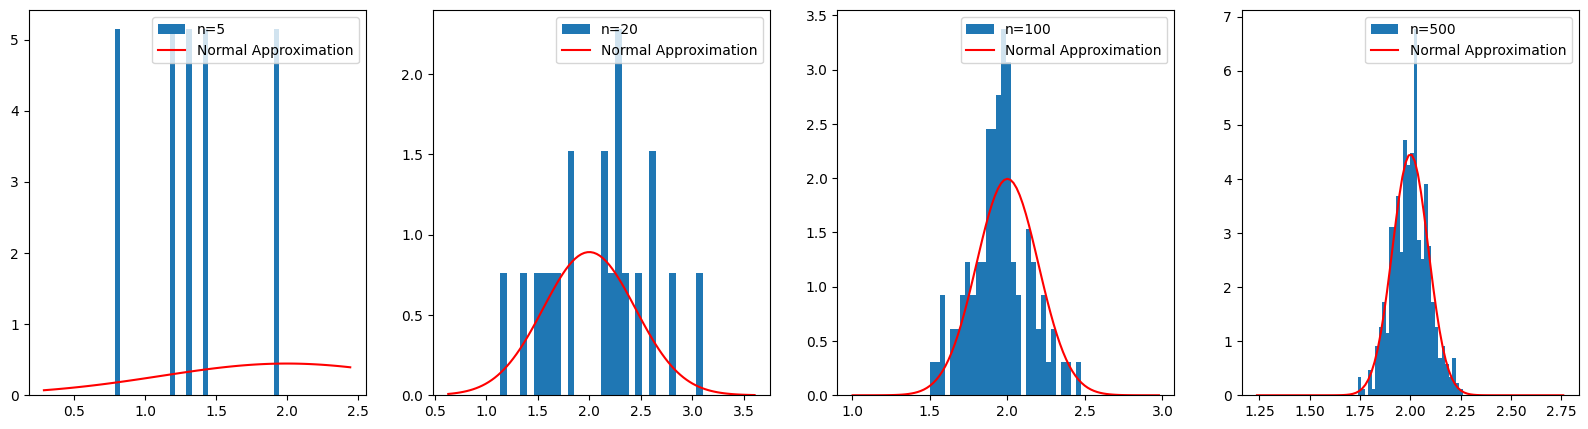

In [44]:
# Plot 4 different histograms of the sample means with overlaid normal distributions
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

mu = 2  # mean of exponential distribution
for idx, n in enumerate(means):
  axes[idx].hist(means[n], bins=30, density=True, label=f"n={n}")
  
  sigma = 2 / np.sqrt(n)  # standard deviation of sample mean
  x = np.linspace(np.min(means[n])-0.5, np.max(means[n])+0.5, 100)
  y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
  axes[idx].plot(x, y, color='red', label='Normal Approximation')

  axes[idx].legend()
plt.show()

# Bias–Variance Tradeoff

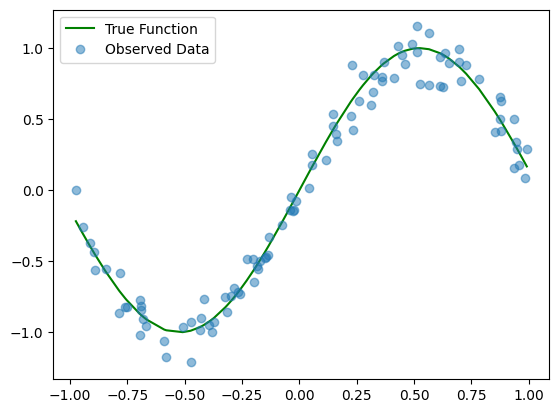

In [5]:
N = 100
x = np.random.uniform(-1, 1, N)
x.sort()
y_true = np.sin(3*x)
y_observed = y_true + np.random.randn(N) * 0.1

plt.plot(x, y_true, label="True Function", color='green')
plt.plot(x, y_observed, 'o', label="Observed Data", alpha=0.5)
plt.legend()
plt.show()


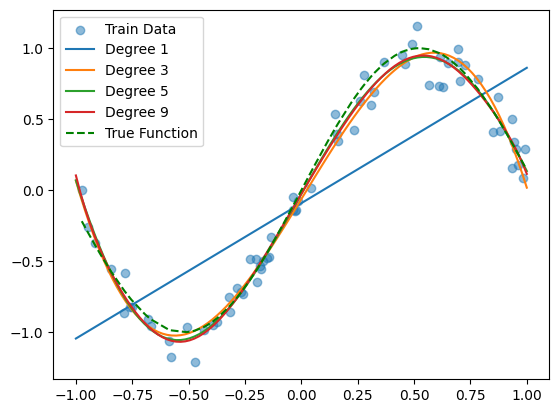

In [7]:
# Take random 70% of sample as train sample
train_size = int(0.7 * N)
train_indices = np.random.choice(N, train_size, replace=False)
x_train, y_train = x[train_indices], y_observed[train_indices]
x_test, y_test = x[np.setdiff1d(np.arange(N), train_indices)], y_observed[np.setdiff1d(np.arange(N), train_indices)]

# Fit polynomial models of varying degrees and plot
degrees = [1, 3, 5, 9]
plt.scatter(x_train, y_train, label="Train Data", alpha=0.5)
x_plot = np.linspace(-1, 1, 100)
for deg in degrees:
    coeffs = np.polyfit(x_train, y_train, deg)
    y_plot = np.polyval(coeffs, x_plot)
    plt.plot(x_plot, y_plot, label=f"Degree {deg}")
plt.plot(x, y_true, label="True Function", color='green', linestyle='--')
plt.legend()
plt.show()

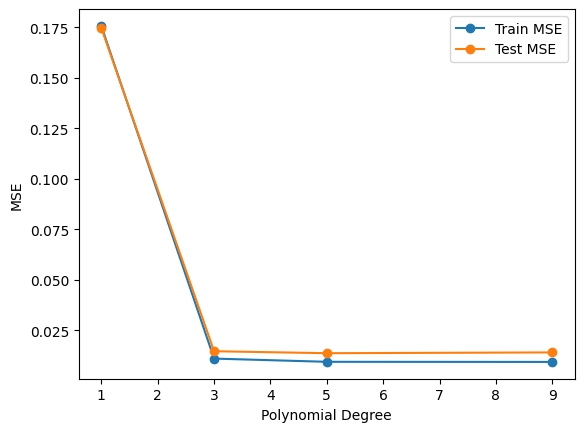

In [8]:
# Train MSE and Test MSE for varying polynomial degrees
train_mse = []
test_mse = []
for deg in degrees:
    coeffs = np.polyfit(x_train, y_train, deg)
    y_train_pred = np.polyval(coeffs, x_train)
    y_test_pred = np.polyval(coeffs, x_test)
    train_mse.append(mse(y_train, y_train_pred))
    test_mse.append(mse(y_test, y_test_pred))

plt.plot(degrees, train_mse, marker='o', label="Train MSE")
plt.plot(degrees, test_mse, marker='o', label="Test MSE")
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.legend()
plt.show()